In [19]:
import librosa
audio_data = 'cough.wav'
x , sr = librosa.load(audio_data)
print("Частота дискретизации: " + str(sr))

Частота дискретизации: 22050


In [20]:
# Ресемплим до 44,1 кГц

librosa.load(audio_data, sr=44100)

(array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 5.7615176e-05,
        8.8153894e-05, 0.0000000e+00], dtype=float32),
 44100)

In [21]:
# Прослушиваем, что всё нормально

import IPython.display as ipd
ipd.Audio(audio_data)

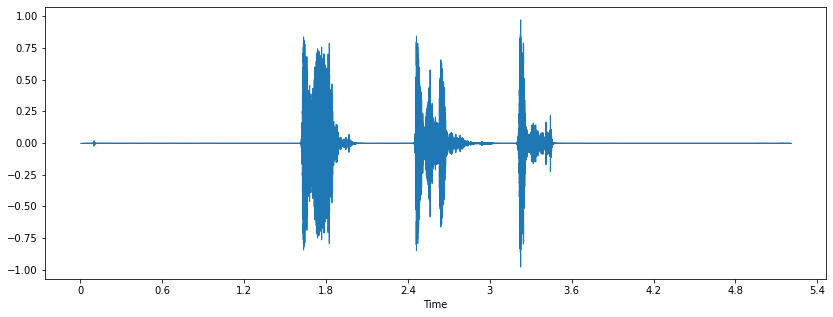

In [22]:
# Строим график массива аудио

%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

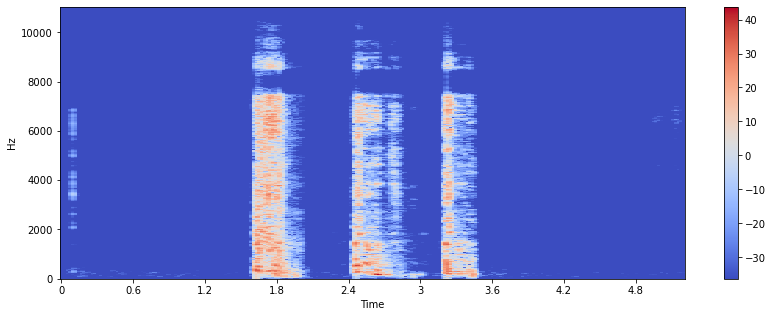

In [23]:
# Строим спектрограмму через кратковременное преобразование Фурье

X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

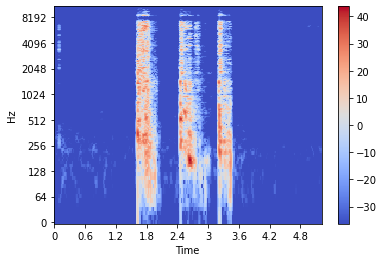

In [24]:
# Преобразуем ось частот в логарифмическую

librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [25]:
# Создаем аудиосигнал для последующего извлечения признаков - ОДНОРАЗОВАЯ ОПЕРАЦИЯ

import numpy as np
import soundfile as sf


#sr = 22050                                       # частота дискретизации
#T = 5.0                                          # секунды
#t = np.linspace(0, T, int(T*sr), endpoint=False) # переменная времени
#x = 0.5*np.sin(2*np.pi*220*t)                    # чистая синусоидная волна при 220 Гц

# проигрывание аудио
#ipd.Audio(x, rate=sr)

In [26]:
# сохранение аудио
#sf.write('tone_220.wav', x, sr, 'PCM_24')

## Спектральный центроид

C:\Users\ARTYOM~1.ALE\AppData\Local\Temp/ipykernel_19756/1479434613.py:3: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.9244837e-07 4.2707044e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]


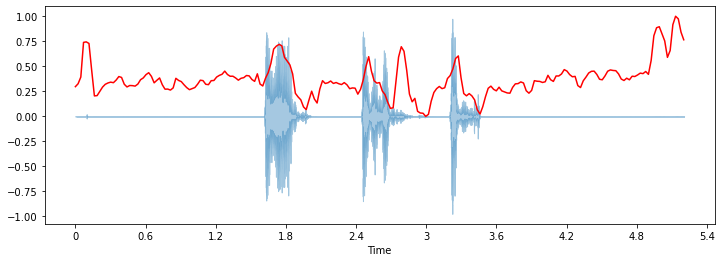

In [27]:
import sklearn

spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

# Вычисление временной переменной для визуализации
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Нормализация спектрального центроида для визуализации
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

# Построение спектрального центроида вместе с формой волны
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

## Спектральный спад

C:\Users\ARTYOM~1.ALE\AppData\Local\Temp/ipykernel_19756/3508554141.py:1: FutureWarning: Pass y=[0.01       0.01       0.01       ... 0.01000059 0.01004271 0.01      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]


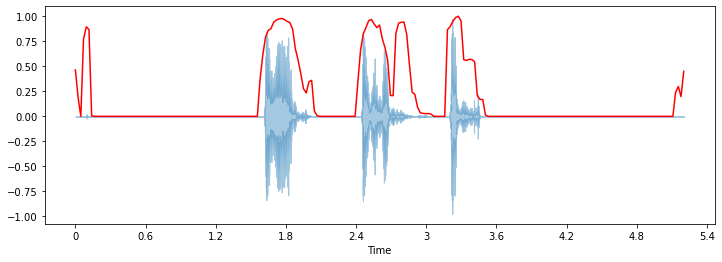

In [30]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

## Спектральная ширина

C:\Users\ARTYOM~1.ALE\AppData\Local\Temp/ipykernel_19756/5576424.py:1: FutureWarning: Pass y=[0.01       0.01       0.01       ... 0.01000059 0.01004271 0.01      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
C:\Users\ARTYOM~1.ALE\AppData\Local\Temp/ipykernel_19756/5576424.py:2: FutureWarning: Pass y=[0.01       0.01       0.01       ... 0.01000059 0.01004271 0.01      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
C:\Users\ARTYOM~1.ALE\AppData\Local\Temp/ipykernel_19756/5576424.py:3: FutureWarning: Pass y=[0.01       0.01       0.01       ... 0.01000059 0.01004271 0.01      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_bandwidth_4 = librosa.feature.spectral_ban

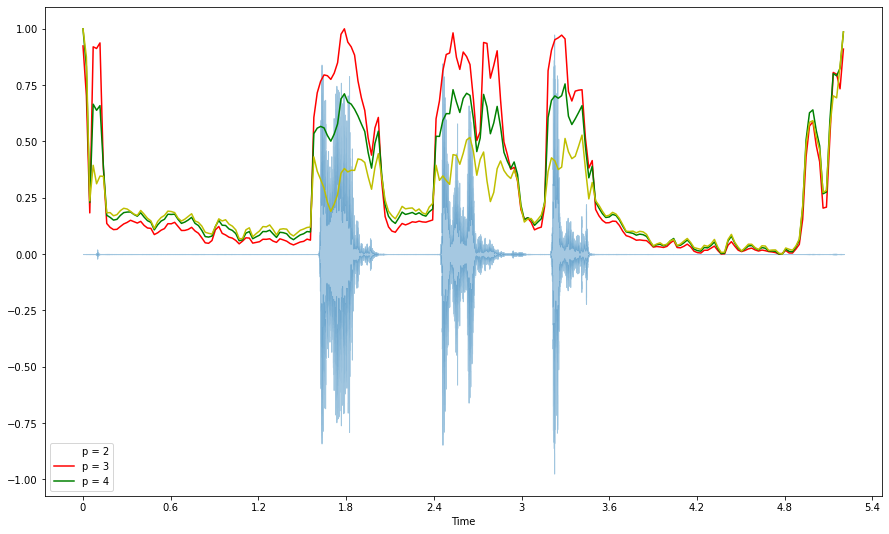

In [33]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

## Скорость пересечения нуля

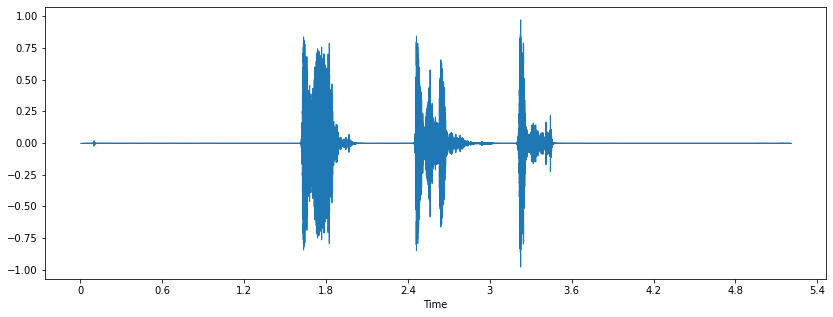

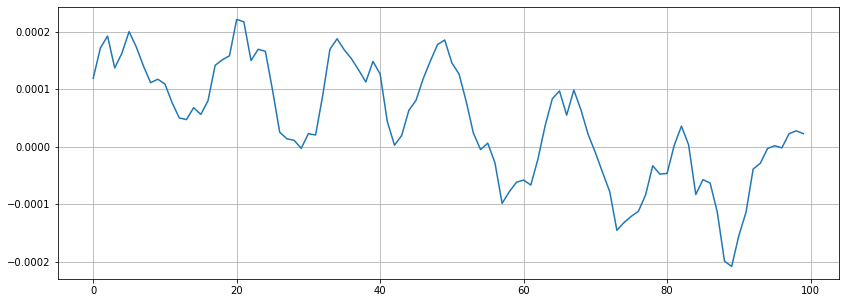

In [35]:
x, sr = librosa.load('cough.wav')
# Построение графика сигнала:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)
# Увеличение масштаба:
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [36]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

12


## Мел-частотные кепстральные коэффициенты (MFCC)

(20, 225)


C:\Users\ARTYOM~1.ALE\AppData\Local\Temp/ipykernel_19756/3131428687.py:1: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.9244837e-07 4.2707044e-05
 0.0000000e+00], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr)


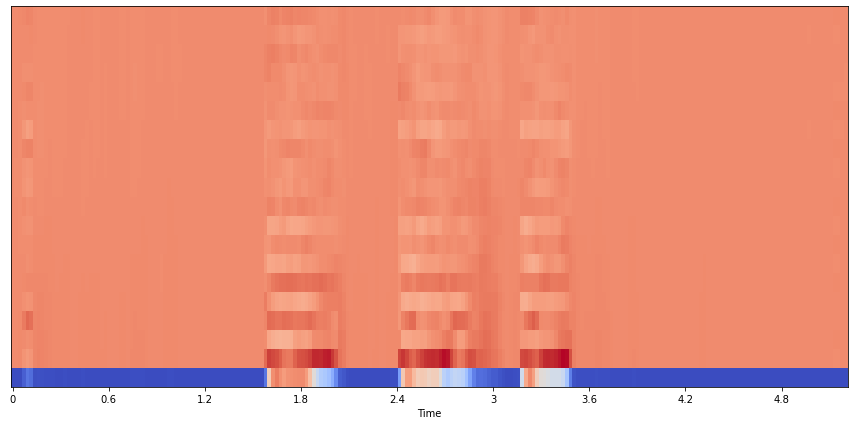

In [38]:
mfccs = librosa.feature.mfcc(x, sr)
print(mfccs.shape)

# Отображение MFCC:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

## Вектор цветности (признаки)

C:\Users\ARTYOM~1.ALE\AppData\Local\Temp/ipykernel_19756/3393197895.py:1: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.9244837e-07 4.2707044e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chromagram = librosa.feature.chroma_stft(x, sr=sr)


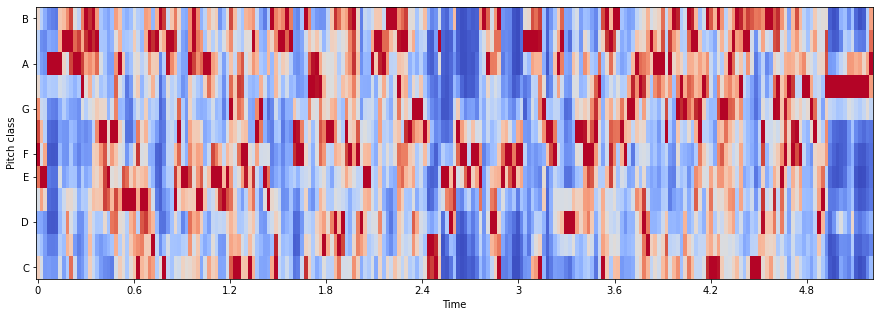

In [42]:
chromagram = librosa.feature.chroma_stft(x, sr=sr)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm')